<a href="https://colab.research.google.com/github/ParthSharma1197/EDA-Capston-Bike-Sharing-Demand-Prediction-/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [116]:
## let's import the libraries:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns



from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt



In [117]:
#let's mount the google drive for import the dtaset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [118]:
#loading the dataset
df_Rbike=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CAPSTONE EDA-Bike Sharing Demand Prediction /SeoulBikeData.csv',encoding ='latin')

In [119]:
# view of the first five rows of the data:
df_Rbike.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


## **Unvieling the mystry in the dataset**




In [120]:
#to have a view over the number of shape of the dataset
df_Rbike.shape

(8760, 14)

In [121]:
#General go through on the dataset to check the datatype
df_Rbike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [122]:
# We will have a look at the basic statistical characteristics of each numerical feature 
df_Rbike.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


Here we have an observation from the above description that 'Rented Bike Count','Visiblity' are the ones where there is considerable difference between the mean and median and we can say that these might have a skewed distribution.Otherwise, almost all the other do not have much difference. 

In [123]:
#a normal check over for the null/missing values
df_Rbike.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [124]:
#having a look at the unique value
df_Rbike.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [125]:
#Just having a look at various input features to analyse which of them are relevant for our analysis.
df_Rbike.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

## * Now, we will head towards our next stage i.e **Data Pre-processing**

The majority of the real-world datasets are highly susceptible to missing, inconsistent, and noisy data due to their heterogeneous origin. 

Applying algorithms on this noisy data would not give quality results as they would fail to identify patterns effectively. Data Processing is, therefore an important step or stage to improve the overall data quality.

Duplicate or missing values may give an incorrect view of the overall statistics of data.
Outliers and inconsistent data points often tend to disturb the model’s overall learning, leading to false predictions.
Quality decisions must be based on quality data. Data Preprocessing is important to get this quality data, without which it would just be a Garbage In, Garbage Out scenario.

Major Tasks in Data Preprocessing:
1. Data cleaning
2. Data integration
3. Data reduction
4. Data transformatio

### **Handling the Missing Values**

In [126]:
#a normal check over for the null/missing values
df_Rbike.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Luckily there are no null values.Very rare sight to have

#####  **We can check for duplicate values in our dataset as the presence of duplicate values will hamper the accuracy of our ML model.**

In [127]:
# check for the missing values
duplicate=df_Rbike.duplicated().sum()
print("The number of duplicate values in the data set are:",duplicate)

The number of duplicate values in the data set are: 0


Hence we can say that the number of duplicated values and Missing Values in our are ZERO in our dataset.Therefore no action to be taken on the data set on this regard.

**We need to rename the columns in such a way that easy to access and used during our analysis.**
 
  1.We will eliminate the space present where multiple words present in a column name.


  2.We will remove the unit present in order to make the use easy. 




In [128]:
#renaming the column:
df_Rbike=df_Rbike.rename(columns={'Date':'date','Rented Bike Count':'rented_bike_count','Temperature(°C)':'temperature',
                                'Hour':'hour','Humidity(%)':'humidity','Wind speed (m/s)':'wind_speed',
                                'Visibility (10m)':'visibility','Dew point temperature(°C)':'dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'solar_radiation','Rainfall(mm)':'rainfall',
                                'Snowfall (cm)':'snowfall','Seasons':'seasons','Holiday':'holiday','Functioning Day':'functioning_day'})

In [129]:
#Checking for the changes made on the dataset:
df_Rbike.head()

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [130]:
#Let's have a look at the datatypes of all the columns to get them is a proper format:
df_Rbike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   8760 non-null   object 
 1   rented_bike_count      8760 non-null   int64  
 2   hour                   8760 non-null   int64  
 3   temperature            8760 non-null   float64
 4   humidity               8760 non-null   int64  
 5   wind_speed             8760 non-null   float64
 6   visibility             8760 non-null   int64  
 7   dew_point_temperature  8760 non-null   float64
 8   solar_radiation        8760 non-null   float64
 9   rainfall               8760 non-null   float64
 10  snowfall               8760 non-null   float64
 11  seasons                8760 non-null   object 
 12  holiday                8760 non-null   object 
 13  functioning_day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

### **Tackling with each column one by one:**

First column is the date column since it is object dtype, we need to convert it to date dtype so that we can extract numerous information for this date column only

In [131]:
## Breaking the date column into informative form to make it productive for our model.
df_Rbike['date'] = pd.to_datetime(df_Rbike['date'])

In [132]:
#informative features extracted from the date column 
df_Rbike['year'] = df_Rbike['date'].dt.year
df_Rbike['month'] = df_Rbike['date'].dt.month
df_Rbike['date_dow_name'] = df_Rbike['date'].dt.day_name()

In [133]:
#looking at the changes made onto the dataset:
df_Rbike.head()

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,year,month,date_dow_name
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday


In [134]:
df_Rbike['year'].unique()

array([2017, 2018])

In [135]:
#looking at the unique values of years in our data set
df_Rbike['year'].unique()

array([2017, 2018])

* Since there are only two years,it would not be advisable to use Year as a feature (but showed it anyways) because presumably we want to use this predictive model in the future and those future years wouldn’t be included in the dataset.The year column could be used for data visualisation but for the model it will not good.Therefore, we will drop it in the later stages. 


In [136]:
#Same for the month for which we have data since it is a 2 year data thus it would have been pretty obvious that it would have covered all the 12 months
df_Rbike['month'].unique()  

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [137]:
#checking for the unique values in week
df_Rbike['date_dow_name'].unique()

array(['Thursday', 'Sunday', 'Wednesday', 'Friday', 'Monday', 'Saturday',
       'Tuesday'], dtype=object)

In [138]:
## creating a new column of 'date_is_weekend' by applying 'ONE-HOT-ENCODING' to make it usable fo the model.
df_Rbike['date_is_weekend'] = np.where(df_Rbike['date_dow_name'].isin(['Sunday', 'Saturday']), 1,0)

* So we convert the "date" column into 3 different column i.e"year","month","day".

  1. The "year" column in our data set is basically contain the 2 unique number contains the details of from 2017  to 2018  so if i consider this is a one year then we don't need the "year" column so we drop it.
  2. The other column "day", it contains the details about the each day of the month, for our relevence we don't need each day of each  month data but we need the data about, if a day is a weekday or a weekend so we convert it into this format and drop the "day"       column.

In [139]:
## Dropping the columns like DATE, and YEAR for the above state reasons
df_Rbike=df_Rbike.drop(columns=['date','date_dow_name','year'],axis=1)

In [140]:
#Again looking at the changes made onto the dataset:
df_Rbike.head()

,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,month,date_is_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


Since, we have completely worked upon the date feature now we should move further for the other fetures.

In [141]:
# Since 'hour','month' and ' date_is_weekend ' must be regarded as Categorical data therefore the type need to be changed
df_Rbike[['hour','month','date_is_weekend']]=df_Rbike[['hour','month','date_is_weekend']].astype('object')

In [142]:
#lets check for the applied changes
df_Rbike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rented_bike_count      8760 non-null   int64  
 1   hour                   8760 non-null   object 
 2   temperature            8760 non-null   float64
 3   humidity               8760 non-null   int64  
 4   wind_speed             8760 non-null   float64
 5   visibility             8760 non-null   int64  
 6   dew_point_temperature  8760 non-null   float64
 7   solar_radiation        8760 non-null   float64
 8   rainfall               8760 non-null   float64
 9   snowfall               8760 non-null   float64
 10  seasons                8760 non-null   object 
 11  holiday                8760 non-null   object 
 12  functioning_day        8760 non-null   object 
 13  month                  8760 non-null   object 
 14  date_is_weekend        8760 non-null   object 
dtypes: f

##  EXPLORATORY DATA ANALYSIS

EDA or Exploratory Data Analysis is the critical process of performing the initial investgation on the data to find the anamolies in our data and shape it such that it is useful for taking some insights to sole our purpose. There are certain step that we follow initially we will clean our data and make it free from anamolies such as Nan values,missing values and such values that could hinder the accuacy of our analysis.

Now we will perform some EDA  and try to get some insight from the dataset available

In [143]:
## Lets understand the pattern of our target variable with respect to the other independent variables


[Text(0.5, 1.0, 'COUNT OF RENTED BIKE ON HOURS OF A DAY')]

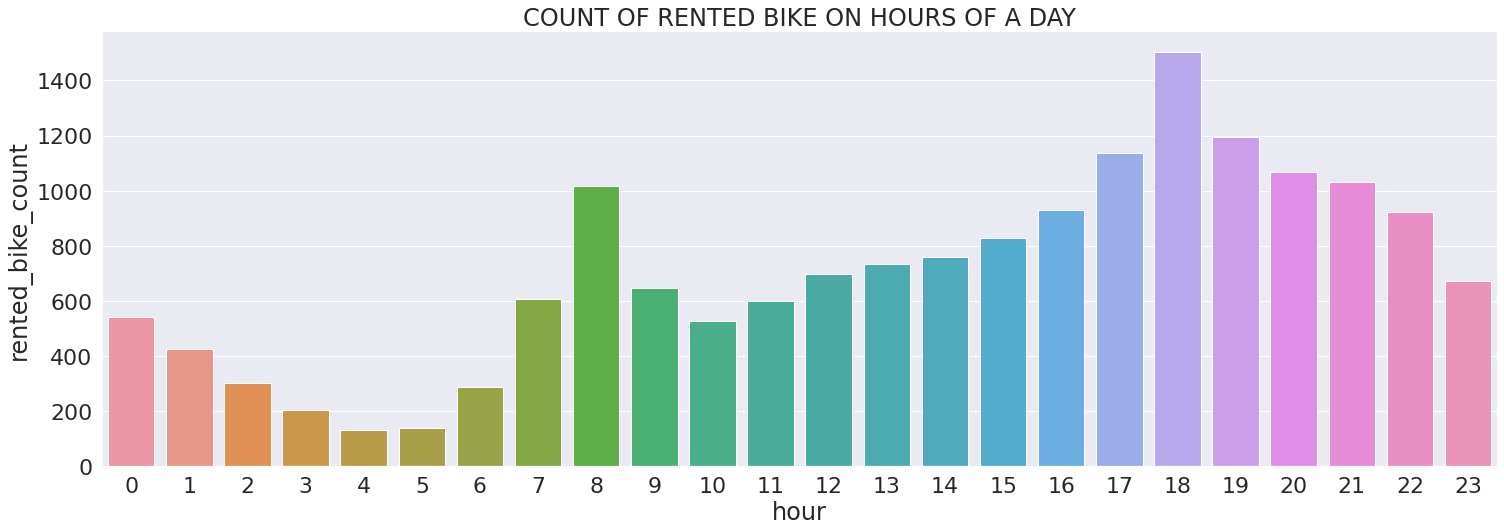

In [144]:
## Plot for 'hour' vs 'rented_bike_count'
sns.set(font_scale = 2)
fig,ax=plt.subplots(figsize=(25,8))
sns.barplot(data=df_Rbike,x='hour',y='rented_bike_count',ci=None,ax=ax,capsize=.2)
ax.set(title='COUNT OF RENTED BIKE ON HOURS OF A DAY')

* **Observations:**  

  1. In the above plot which shows the use of rented bike in accordance with the hours.
  2. In general people used rented bikes during their commuting hours i.e from 7am to 9am in morning and 5pm to 7pm in the evening.



[Text(0.5, 1.0, 'COUNT OF RENTED BIKES ON WEEKENDS AND WEEKDAYS')]

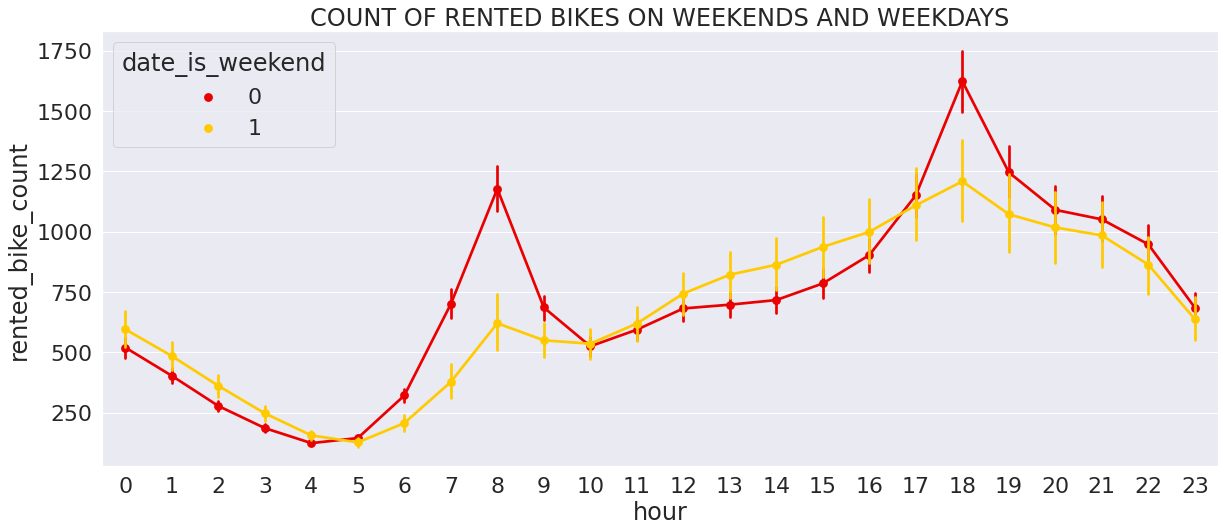

In [145]:
#here we look at the rented bikes count hourly on weeekday as well as weekends:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df_Rbike,x='hour',y='rented_bike_count',hue='date_is_weekend',ax=ax,palette='hot')
ax.set(title='COUNT OF RENTED BIKES ON WEEKENDS AND WEEKDAYS')

0-Weekday 1-Weekend

* **Observations:** 


  1.   From the above plot we can analyse that in the week days which represent in red colour show that the demand of the bike higher because of the office.
  2.  Peak Time are 7 am to 9 am and 5 pm to 7 pm and it show that the demand of rented bikes are very low specially in the morning hour but when the evening start from 4 pm to 8 pm the demand slightly high but shows the decreasing trend and that is due obvious reasons.






[Text(0.5, 1.0, 'HOURLY COUNT OF RENTED BIKE ON HOLIDAY AND NO-HOLIDAY')]

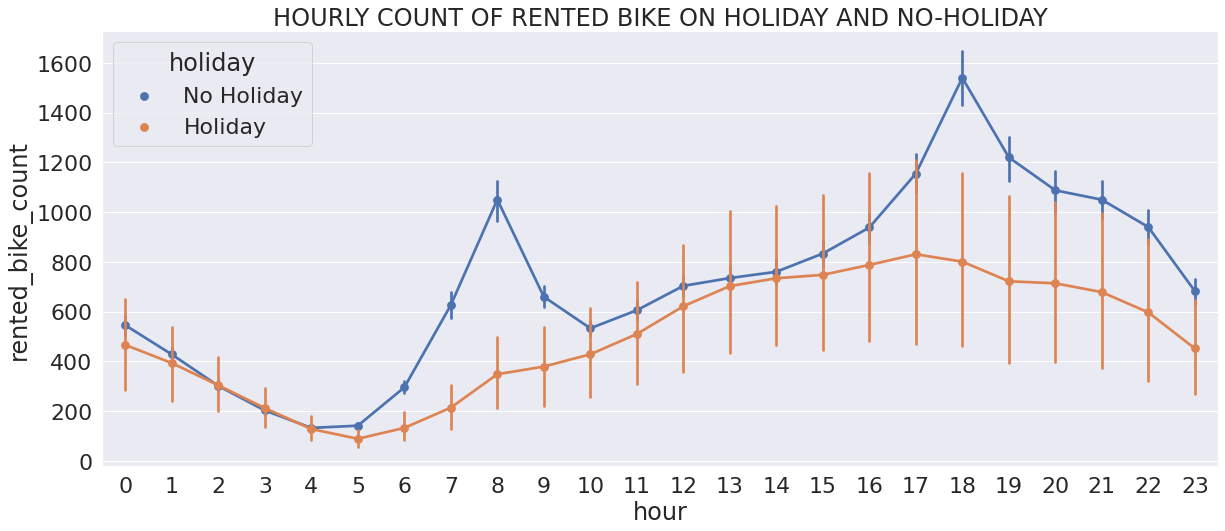

In [146]:
#here we look at the rented bikes count hourly on holidays and no-holiday 
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df_Rbike,x='hour',y='rented_bike_count',hue='holiday')
ax.set(title='HOURLY COUNT OF RENTED BIKE ON HOLIDAY AND NO-HOLIDAY')

* **Observations**:
  1. From the above plot we can analyse that on the non holiday days which represent in blue colour show that the demand of the bike higher because of the office.
  2. Whereas on the holidays the rented bikes count is not that low but lesser in comparison to the non-holdays.




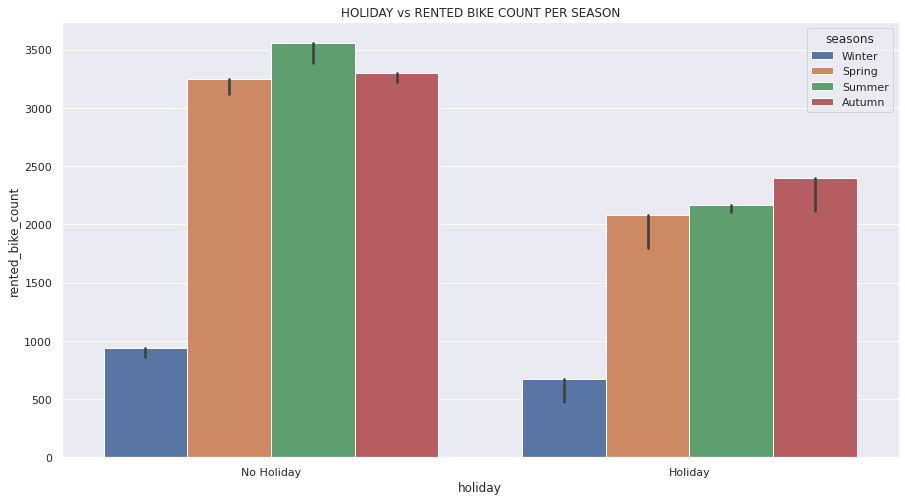

In [147]:
#Barplot for HOLIDAY vs RENTED BIKE COUNT PER SEASON
sns.set(font_scale = 1)
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=df_Rbike,x='holiday',y='rented_bike_count',hue='seasons',estimator=max)
ax.set_title('HOLIDAY vs RENTED BIKE COUNT PER SEASON')
plt.show()

* **Observations**:
  1. Here we can observe thet irrespective of the season the rented bikes are more in demand on the non-holiday.
  2. Also on a No-Holiday the demand of bikes is high in the Summer season whereas Autumn Season tops the list on a Holiday 

[Text(0.5, 1.0, 'COUNT OF RENTED BIKES AS PER WEEK DAYS AND WEEKENDS')]

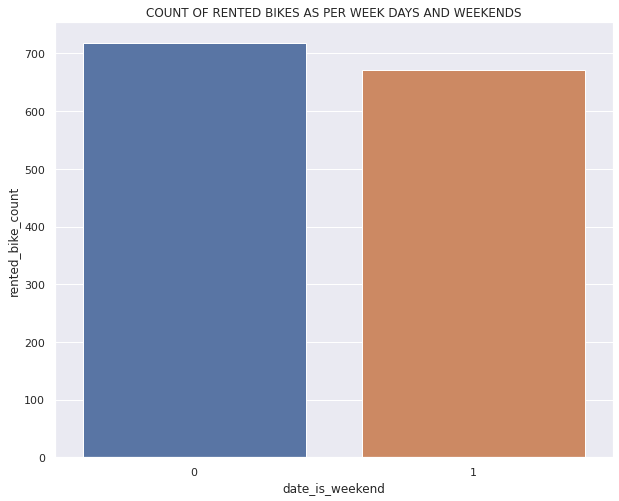

In [148]:
# Visualizing the COUNT OF RENTED BIKES AS PER WEEKDAYS AND WEEKENDS
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df_Rbike,x='date_is_weekend',y='rented_bike_count',ci=None,ax=ax)
ax.set(title='COUNT OF RENTED BIKES AS PER WEEK DAYS AND WEEKENDS')

0-Weekday 1-Weekend

[Text(0.5, 1.0, 'COUNT OF RENTED BIKES ON HOLIDAY AND NON-HOLIDAY')]

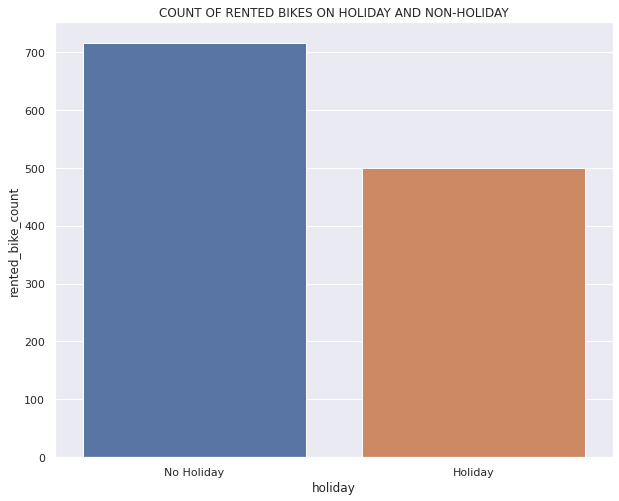

In [149]:
# Visualizing the COUNT OF RENTED BIKES ON HOLIDAY AND NON-HOLIDAY'
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df_Rbike,x='holiday',y='rented_bike_count',ci=None,ax=ax,capsize=.2)
ax.set(title='COUNT OF RENTED BIKES ON HOLIDAY AND NON-HOLIDAY')

* **Observations**:
It is clearly observable that the bikes are rented more on a non-holiday rather than Holiday

[Text(0.5, 1.0, 'COUNT OF RENTED BIKES PER SEASON')]

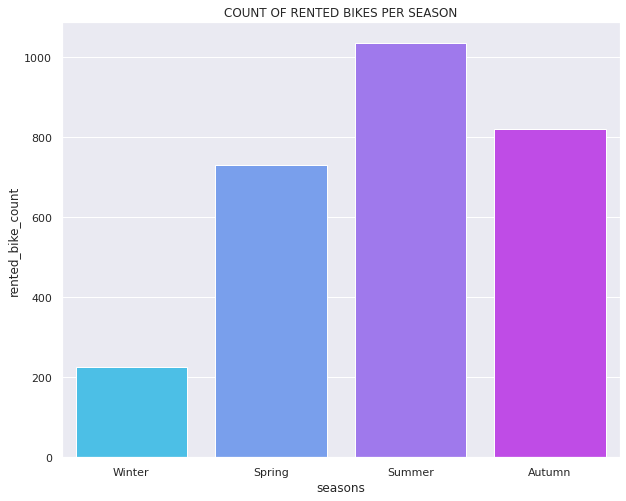

In [150]:
#Analysing the demand of the Rented Bikes per Season
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df_Rbike,x='seasons',y='rented_bike_count',ci=None,palette='cool',ax=ax)
ax.set(title='COUNT OF RENTED BIKES PER SEASON')

[Text(0.5, 1.0, 'COUNT OF RENTED BIKES PER HOUR IN DIFFERENT SEASONS')]

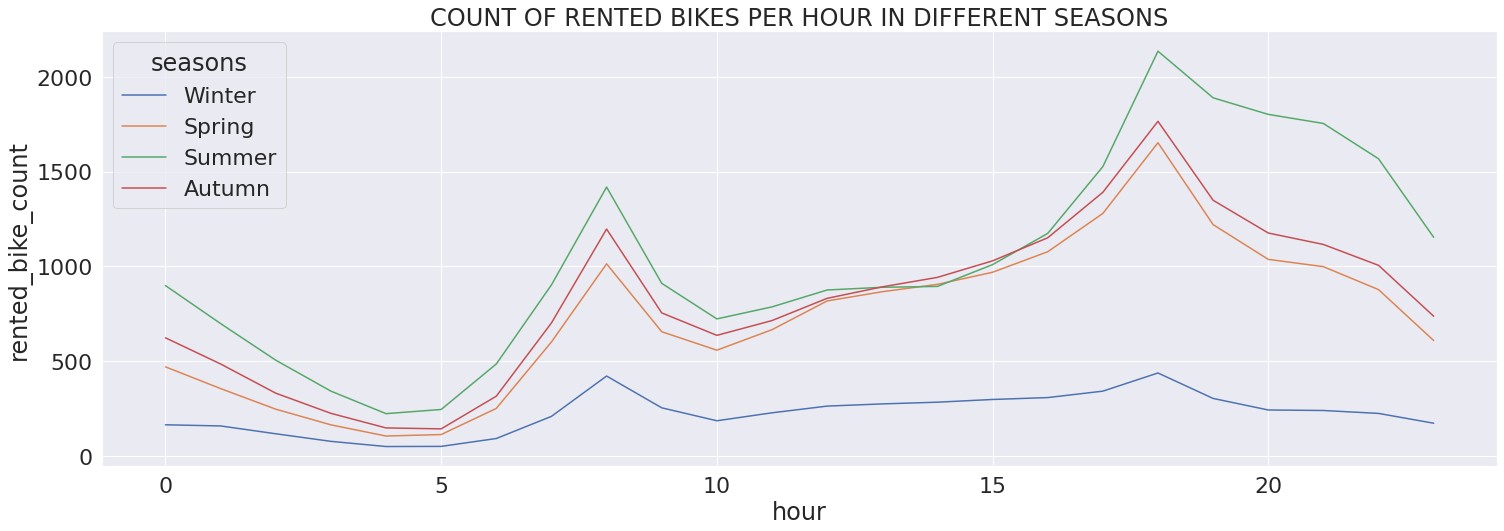

In [151]:
# Looking at how the demand of rented bikes varies per hour in different seasons
sns.set(font_scale = 2)
fig,ax=plt.subplots(figsize=(25,8))
sns.lineplot(data=df_Rbike,x='hour',y='rented_bike_count',hue='seasons',ci=None)
ax.set(title='COUNT OF RENTED BIKES PER HOUR IN DIFFERENT SEASONS')

### Since we have understood the pattern of our categorical variables and got a wholesome understanding of the dataset therefore now we will analyse our numerical features